# Heart Disease Risk Prediction: Logistic Regression


**Objective:** Implement logistic regression from scratch to predict heart disease risk using clinical features.

---

## 0. Setup

In [8]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

---

## 1. Load and Prepare the Dataset

**Goal:** Load the CSV, binarize target, do EDA, handle missing/outliers, plot class distribution.

**Requirements:**
- 70/30 train/test split (**stratified**)
- Normalize numerical features
- Select **≥ 6 features** (e.g., Age, Cholesterol, BP, Max HR, ST Depression, Vessels)

**Reporting:** Markdown summary of insights and preprocessing decisions.

---

### 1.1 Load CSV

In [10]:
CSV_PATH = "Heart_Disease_Prediction.csv"  

df = pd.read_csv(CSV_PATH)
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


---

### 1.2 Inspect Data
Check shape, columns, types, and missing values.

In [11]:
print("Shape (rows, cols):", df.shape)
df.info()

Shape (rows, cols): (270, 14)
<class 'pandas.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    str    
dtypes: floa

---

### 1.3 Target binarization

In [12]:
TARGET_COL = "Heart Disease"

df[TARGET_COL] = df[TARGET_COL].map({
    "Absence": 0,
    "Presence": 1
})

df[TARGET_COL].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

---

### 1.4 EDA: Exploratory Data Analysis

##### *Descriptive Statistics Summary*

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


#### *Missing Values Check*


In [14]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

#### *Outliers*

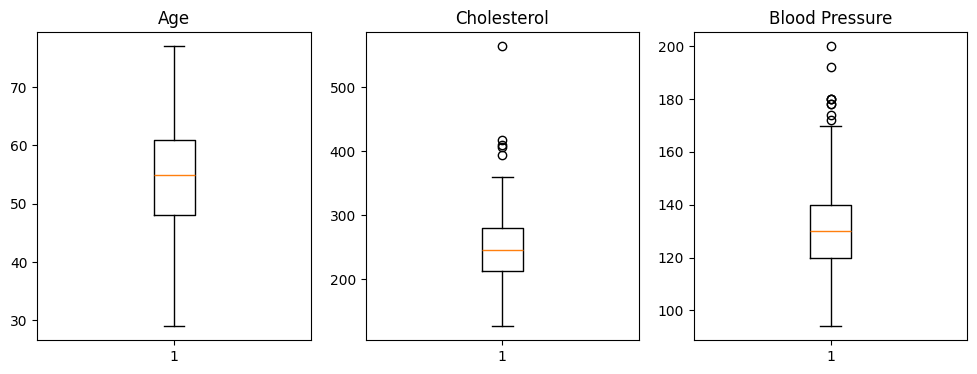

Age range: 29 - 77
Cholesterol range: 126 - 564
Blood Pressure range: 94 - 200


In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.boxplot(df["Age"])
plt.title("Age")

plt.subplot(1,3,2)
plt.boxplot(df["Cholesterol"])
plt.title("Cholesterol")

plt.subplot(1,3,3)
plt.boxplot(df["BP"])
plt.title("Blood Pressure")

plt.show()

print("Age range:", df["Age"].min(), "-", df["Age"].max())
print("Cholesterol range:", df["Cholesterol"].min(), "-", df["Cholesterol"].max())
print("Blood Pressure range:", df["BP"].min(), "-", df["BP"].max())



### *EDA Observations*

Descriptive statistics show that all numerical features fall within medically reasonable ranges. 
For example, patient ages range from 29 to 77 years, resting blood pressure values range from 94 to 200, and cholesterol levels range from 126 to 564.

No missing values were detected in any of the features, which simplifies data preprocessing and model training.

Boxplots for selected continuous variables (Age, Cholesterol, and Blood Pressure) were used to inspect potential outliers. 
Some extreme values were observed, particularly in cholesterol and blood pressure; however, these values are clinically plausible and were therefore retained for modeling.

---


### 1.5 Class Distribution

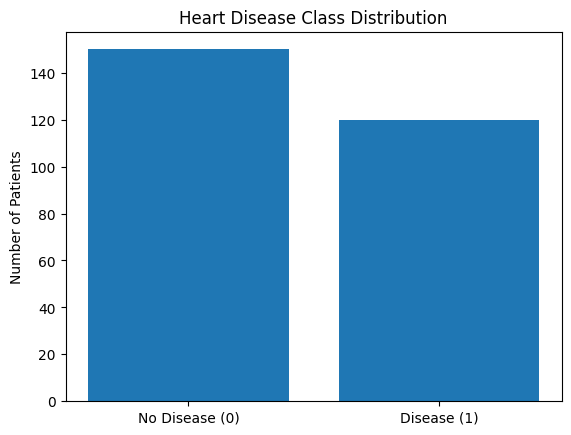

Disease rate: 0.4444444444444444


In [16]:
import matplotlib.pyplot as plt

counts = df[TARGET_COL].value_counts().sort_index()

plt.figure()
plt.bar(["No Disease (0)", "Disease (1)"], counts.values)
plt.title("Heart Disease Class Distribution")
plt.ylabel("Number of Patients")
plt.show()

print("Disease rate:", df[TARGET_COL].mean())


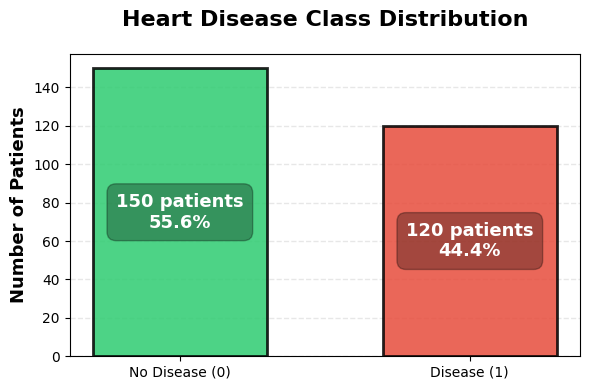

Total patients:     270
Disease rate:       44.44%
Healthy patients:   150 (55.6%)
Disease patients:   120 (44.4%)


In [17]:
import matplotlib.pyplot as plt

counts = df[TARGET_COL].value_counts().sort_index()
plt.figure(figsize=(6, 4))

colors = ['#2ecc71', '#e74c3c'] 

bars = plt.bar(["No Disease (0)", "Disease (1)"], counts.values, 
               color=colors, edgecolor='black', linewidth=2, alpha=0.85, width=0.6)

for i, bar in enumerate(bars):
    height = bar.get_height()
    percentage = height/len(df)*100
    
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{int(height)} patients\n{percentage:.1f}%',
             ha='center', va='center', fontsize=13, fontweight='bold', 
             color='white', bbox=dict(boxstyle='round,pad=0.5', facecolor='black', alpha=0.3))

plt.title("Heart Disease Class Distribution", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Number of Patients", fontsize=13, fontweight='bold')
plt.ylim(0, max(counts.values) * 1.05)
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1)
plt.gca().set_axisbelow(True)


plt.tight_layout()
plt.show()

print(f"Total patients:     {len(df)}")
print(f"Disease rate:       {df[TARGET_COL].mean():.2%}")
print(f"Healthy patients:   {counts[0]:3d} ({counts[0]/len(df)*100:.1f}%)")
print(f"Disease patients:   {counts[1]:3d} ({counts[1]/len(df)*100:.1f}%)")


---

### 1.6 Feature Selection


In [18]:
FEATURES = [
    "Age",
    "BP",
    "Cholesterol",
    "Max HR",
    "ST depression",
    "Number of vessels fluro",
    "Exercise angina"
]

print("Selected features:")
for f in FEATURES:
    print("-", f)


Selected features:
- Age
- BP
- Cholesterol
- Max HR
- ST depression
- Number of vessels fluro
- Exercise angina


#### *Selected Features Rationale*

Seven features were selected based on their clinical relevance and numerical nature, making them suitable for a basic logistic regression model without categorical encoding.

- **Age:** Cardiovascular risk increases with age.
- **BP:** High resting blood pressure is a known risk factor for heart disease.
- **Cholesterol:** Elevated cholesterol levels are strongly associated with coronary artery disease.
- **Max HR:** Lower maximum heart rate during exercise may indicate impaired cardiac function.
- **ST depression:** Indicates abnormal ECG changes related to myocardial ischemia.
- **Number of vessels fluro:** Reflects the number of major vessels affected, indicating disease severity.
- **Exercise angina:** Presence of chest pain induced by exercise is a direct clinical indicator of heart disease.


---

### 1.7 Train/Test Split (70/30, Stratified)

In [19]:
def stratified_split(data, target_col, test_proportion=0.30, seed=42):
    rng = np.random.default_rng(seed)
    

    data_class0 = data[data[target_col] == 0]
    data_class1 = data[data[target_col] == 1]
    

    n_test_0 = int(len(data_class0) * test_proportion)
    n_test_1 = int(len(data_class1) * test_proportion)
    

    indices_0 = rng.permutation(data_class0.index)
    indices_1 = rng.permutation(data_class1.index)
    

    test_indices = np.concatenate([indices_0[:n_test_0], indices_1[:n_test_1]])
    train_indices = np.concatenate([indices_0[n_test_0:], indices_1[n_test_1:]])

    train_data = data.loc[train_indices].sample(frac=1, random_state=seed)
    test_data = data.loc[test_indices].sample(frac=1, random_state=seed)
    
    return train_data, test_data


TARGET_COL = "Heart Disease"

train_df, test_df = stratified_split(df, TARGET_COL, test_proportion=0.30, seed=42)

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

print("Train disease rate:", train_df[TARGET_COL].mean())
print("Test disease rate :", test_df[TARGET_COL].mean())



Train shape: (189, 14)
Test shape : (81, 14)
Train disease rate: 0.4444444444444444
Test disease rate : 0.4444444444444444


---

### 1.8 Feature Normalization
Normalize numerical features (e.g., using z-score or min-max scaling).

In [20]:
def normalize_features(X_train, X_test):
    """
    Normalizes features using Z-score normalization.
    Mean and std are computed ONLY from the training set.
    
    Returns:
    - X_train_norm
    - X_test_norm
    - mu (mean of train)
    - sigma (std of train)
    """
    mu = X_train.mean(axis=0)
    sigma = X_train.std(axis=0)

    sigma[sigma == 0] = 1.0

    X_train_norm = (X_train - mu) / sigma
    X_test_norm  = (X_test - mu) / sigma

    return X_train_norm, X_test_norm, mu, sigma


X_train = train_df[FEATURES].values.astype(float)
y_train = train_df[TARGET_COL].values.astype(int)

X_test = test_df[FEATURES].values.astype(float)
y_test = test_df[TARGET_COL].values.astype(int)


X_train_norm, X_test_norm, mu_full_model, sigma_full_model = normalize_features(X_train, X_test)


mu = mu_full_model
sigma = sigma_full_model

### 1.8 Data Insights Summary

**Summary:**

#### *Dataset Overview*
- **Source:** Kaggle – Heart Disease Dataset  
- **Total patients:** 270  
- **Total features:** 13 clinical features + 1 target variable  
- **Target variable:** Heart Disease  
  - 0 = No disease (Absence)  
  - 1 = Disease present (Presence)


#### *Class Distribution (EDA)*
- **Patients without heart disease (0):** 150 (~56%)  
- **Patients with heart disease (1):** 120 (~44%)  
- **Dataset balance:** Moderately balanced  


#### *Data Quality Checks*
- **Missing values:** None detected  
- **Feature ranges:** All values within medically reasonable limits  
- **Outliers:**  
  - Observed in features such as cholesterol and blood pressure  
  - Values considered clinically plausible and retained  


#### *Train/Test Split*
- **Split ratio:** 70% training / 30% testing  
- **Split method:** Stratified by target variable  
- **Training set:** ~189 patients  
- **Test set:** ~81 patients  
- **Class distribution preserved:** Yes  


#### *Selected Features*
- Age  
- Blood Pressure (BP)  
- Cholesterol  
- Maximum Heart Rate (Max HR)  
- ST Depression  
- Number of Vessels (Fluoroscopy)  
- Exercise-Induced Angina  


#### *Feature Normalization*
- **Normalization method:** Z-score normalization  
- **Computed using:** Training set only  
- **Applied to:** Training and test sets  
- **Purpose:** Ensure equal feature scale and stable gradient descent  


---
## Step 2: Implement Basic Logistic Regression

### 2.1 Sigmoid Function


$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

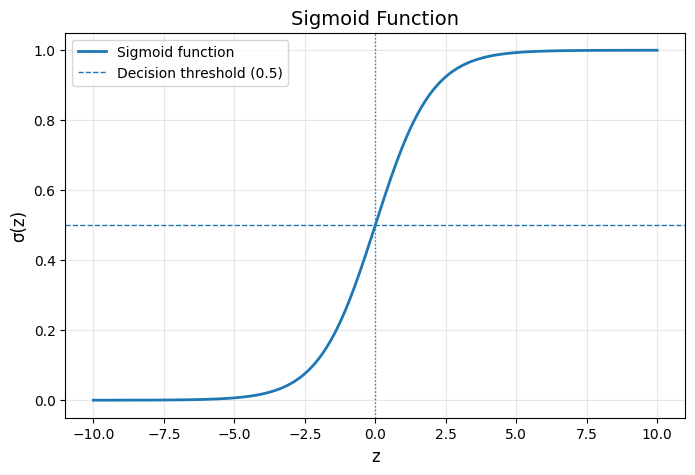

In [21]:
def sigmoid(z):
    """
    Compute the sigmoid of z.
    """
    return 1 / (1 + np.exp(-z))

z_values = np.linspace(-10, 10, 200)
sig_values = sigmoid(z_values)

plt.figure(figsize=(8, 5))

plt.plot(
    z_values,
    sig_values,
    linewidth=2,
    label="Sigmoid function"
)

plt.axhline(
    0.5,
    linestyle="--",
    linewidth=1,
    label="Decision threshold (0.5)"
)

plt.axvline(
    0,
    linewidth=1,
    linestyle=":"
)

plt.title("Sigmoid Function", fontsize=14)
plt.xlabel("z", fontsize=12)
plt.ylabel("σ(z)", fontsize=12)

plt.ylim(-0.05, 1.05)
plt.grid(alpha=0.3)
plt.legend()

plt.show()


---

### 2.2 Cost Function (Binary Cross-Entropy)

$$
     J(\vec{w}, b) =
     -\frac{1}{m}
     \sum_{i=1}^m
     \left[
     y^{(i)} \log f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})
     +
     (1 - y^{(i)}) \log\left(1 - f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)})\right)
     \right].
     $$

In [22]:
def compute_cost(X, y, w, b):
    """
    Computes the binary cross-entropy cost.
    
    Parameters:
    X : normalized feature matrix (m, n)
    y : true labels (m,)
    w : weights (n,)
    b : bias (scalar)
    
    Returns:
    cost : scalar
    """

    m = X.shape[0]

    z = X @ w + b
    f = sigmoid(z)

    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)

    J = -(1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )
    return J


---

### 2.3 Gradient Computation

$$
\frac{\partial J}{\partial w_j}
=
\frac{1}{m}
\sum_{i=1}^m
\left(
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}
\right)
x^{(i)}_j
$$

$$
\frac{\partial J}{\partial b}
=
\frac{1}{m}
\sum_{i=1}^m
\left(
f_{\vec{w}, b}^{(i)}(\vec{x}^{(i)}) - y^{(i)}
\right)
$$

In [23]:
def compute_gradients(X, y, w, b):
    """
    Compute gradients for w and b.
    """
    
    m = X.shape[0]
    z = X @ w + b
    f = sigmoid(z)

    error = f - y

    dw = (1 / m) * (X.T @ error)
    db = (1 / m) * np.sum(error)

    return dw, db

---

### 2.4 Gradient Descent

$$
w_j := w_j - \alpha \frac{\partial J}{\partial w_j},
$$

$$
b := b - \alpha \frac{\partial J}{\partial b},
$$

In [24]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=100):
    """Run gradient descent to optimize w and b."""
    w = w_init.copy()
    b = b_init
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradients(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost(X, y, w, b)
        J_history.append(J)

        if print_every is not None:
            if (i % print_every == 0 or i == num_iters - 1):
                print(f"Iteration {i:4d}: J(w, b) = {J:.4f}")

    return w, b, J_history



---

### 2.5 Train Model
Train on the full training set (α ≈ 0.01, 1000+ iterations).

In [25]:
n_features = X_train_norm.shape[1]
w_init = np.zeros(n_features)
b_init = 0.0

alpha = 0.01         
num_iters = 2000 

w, b, cost_history = gradient_descent(
    X_train_norm,
    y_train,
    w_init,
    b_init,
    alpha,
    num_iters,
    print_every=200
)

print("Training completed.")
print("Final training cost:", cost_history[-1])

Iteration    0: J(w, b) = 0.6910
Iteration  200: J(w, b) = 0.5048
Iteration  400: J(w, b) = 0.4620
Iteration  600: J(w, b) = 0.4457
Iteration  800: J(w, b) = 0.4378
Iteration 1000: J(w, b) = 0.4334
Iteration 1200: J(w, b) = 0.4308
Iteration 1400: J(w, b) = 0.4291
Iteration 1600: J(w, b) = 0.4280
Iteration 1800: J(w, b) = 0.4272
Iteration 1999: J(w, b) = 0.4266
Training completed.
Final training cost: 0.42659535041970464


---

### 2.6 Plot Cost vs Iterations

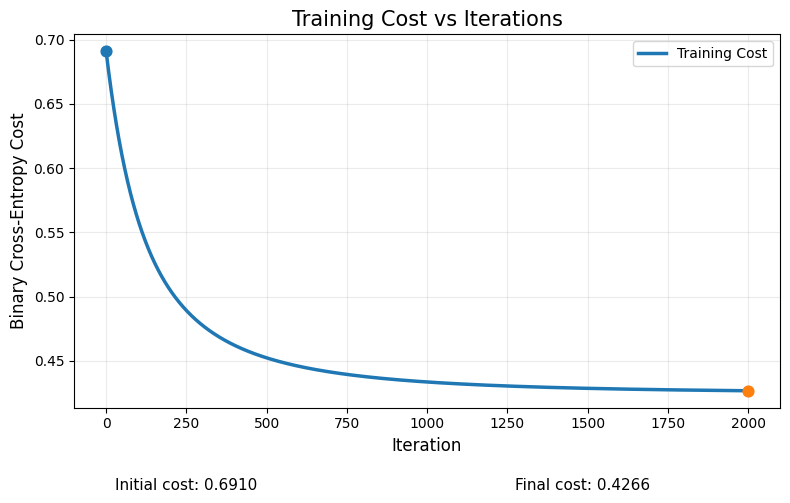

In [26]:
initial_cost = cost_history[0]
final_cost = cost_history[-1]

plt.figure(figsize=(8, 5))

plt.plot(
    cost_history,
    linewidth=2.5,
    label="Training Cost"
)

plt.scatter(0, initial_cost, zorder=3, s=60)
plt.scatter(len(cost_history) - 1, final_cost, zorder=3, s=60)

plt.title("Training Cost vs Iterations", fontsize=15)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Binary Cross-Entropy Cost", fontsize=12)

plt.grid(alpha=0.25)
plt.legend()

plt.figtext(
    0.15, 0.01,
    f"Initial cost: {initial_cost:.4f}",
    ha="left",
    fontsize=11
)

plt.figtext(
    0.65, 0.01,
    f"Final cost: {final_cost:.4f}",
    ha="left",
    fontsize=11
)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


The plot shows the evolution of the training cost across iterations. 
The cost decreases steadily from the initial value and converges toward a minimum, indicating that gradient descent is successfully optimizing the model parameters.

---

### 2.7 Prediction Function

In [27]:
def predict(X, w, b, threshold=0.5):
    """
    Predicts binary class labels using a threshold.
    
    Parameters:
    X : (m, n) feature matrix
    w : (n,) weights
    b : scalar bias
    threshold : classification threshold
    
    Returns:
    predictions : (m,) binary labels (0 or 1)
    """
    z = X @ w + b
    probs = sigmoid(z)
    predictions = (probs >= threshold).astype(int)
    return predictions

---

### 2.8 Evaluation Metrics

In [28]:


def confusion_matrix_elements(y_true, y_pred):
    """
    Computes TP, FP, TN, FN for binary classification.
    """
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, FP, TN, FN


def accuracy(y_true, y_pred):
    TP, FP, TN, FN = confusion_matrix_elements(y_true, y_pred)
    return (TP + TN) / (TP + TN + FP + FN)


def precision(y_true, y_pred):
    TP, FP, _, _ = confusion_matrix_elements(y_true, y_pred)
    return TP / (TP + FP) if (TP + FP) > 0 else 0.0


def recall(y_true, y_pred):
    TP, _, _, FN = confusion_matrix_elements(y_true, y_pred)
    return TP / (TP + FN) if (TP + FN) > 0 else 0.0


def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * p * r / (p + r) if (p + r) > 0 else 0.0


y_train_pred = predict(X_train_norm, w, b, threshold=0.5)
y_test_pred  = predict(X_test_norm, w, b, threshold=0.5)

TP_tr, FP_tr, TN_tr, FN_tr = confusion_matrix_elements(y_train, y_train_pred)
TP_te, FP_te, TN_te, FN_te = confusion_matrix_elements(y_test, y_test_pred)


print("Confusion Matrix (TRAIN SET) ")
print(f"True Positives  (Sick correctly identified):     {TP_tr}")
print(f"False Negatives (Sick missed by the model):     {FN_tr}")
print(f"False Positives (Healthy marked as sick):       {FP_tr}")
print(f"True Negatives  (Healthy correctly identified): {TN_tr}")
print()

print("Confusion Matrix (TEST SET)")
print(f"True Positives  (Sick correctly identified):     {TP_te}")
print(f"False Negatives (Sick missed by the model):     {FN_te}")
print(f"False Positives (Healthy marked as sick):       {FP_te}")
print(f"True Negatives  (Healthy correctly identified): {TN_te}")
print()


metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Training Set": [
        accuracy(y_train, y_train_pred),
        precision(y_train, y_train_pred),
        recall(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ],
    "Test Set": [
        accuracy(y_test, y_test_pred),
        precision(y_test, y_test_pred),
        recall(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
    ]
}).round(3)

metrics_df


Confusion Matrix (TRAIN SET) 
True Positives  (Sick correctly identified):     64
False Negatives (Sick missed by the model):     20
False Positives (Healthy marked as sick):       17
True Negatives  (Healthy correctly identified): 88

Confusion Matrix (TEST SET)
True Positives  (Sick correctly identified):     24
False Negatives (Sick missed by the model):     12
False Positives (Healthy marked as sick):       5
True Negatives  (Healthy correctly identified): 40



,Metric,Training Set,Test Set
0,Accuracy,0.804,0.790
1,Precision,0.790,0.828
2,Recall,0.762,0.667
3,F1-score,0.776,0.738


#### *Evaluation Summary*

The model achieves similar performance on the training and test sets, indicating good generalization and no significant overfitting. 
Accuracy remains close to 80% in both sets, showing stable overall performance.

While precision is relatively high, especially on the test set, the recall value is lower, meaning that some patients with heart disease are not detected by the model

---

### 2.9 Results Summary



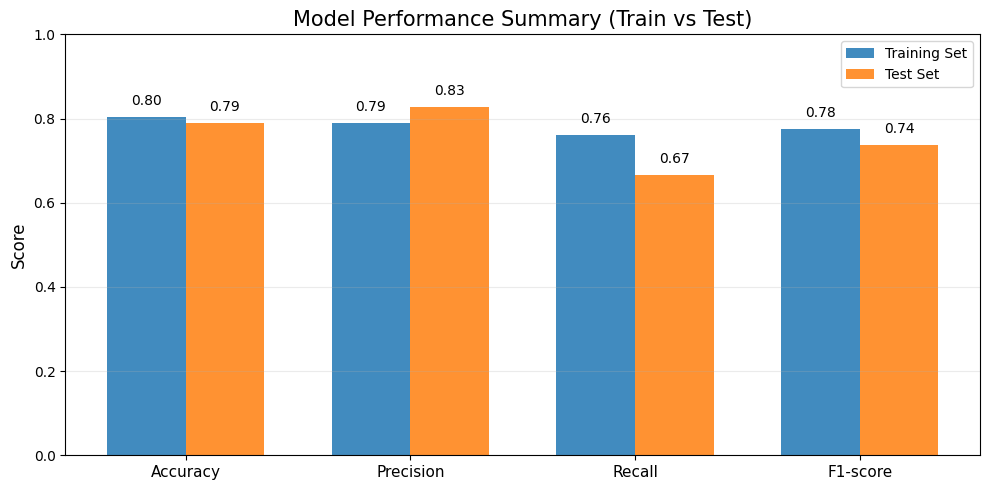

In [29]:

metrics = metrics_df["Metric"]
train_values = metrics_df["Training Set"]
test_values = metrics_df["Test Set"]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10, 5))

bars_train = plt.bar(
    x - width/2,
    train_values,
    width,
    label="Training Set",
    alpha=0.85
)

bars_test = plt.bar(
    x + width/2,
    test_values,
    width,
    label="Test Set",
    alpha=0.85
)


plt.xticks(x, metrics, fontsize=11)
plt.ylim(0, 1)
plt.ylabel("Score", fontsize=12)
plt.title("Model Performance Summary (Train vs Test)", fontsize=15)

plt.legend()
plt.grid(axis="y", alpha=0.25)


for bars in [bars_train, bars_test]:
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.02,
            f"{height:.2f}",
            ha="center",
            va="bottom",
            fontsize=10
        )

plt.tight_layout()
plt.show()



#### *Convergence and Coefficient Interpretation*

The training cost decreases steadily over the iterations and converges to a stable value, indicating that gradient descent successfully optimized the model parameters. 
No oscillations or divergence were observed, suggesting that the chosen learning rate was appropriate.
The learned coefficients show how each feature influences the predicted probability of heart disease. 
Features with positive coefficients increase the risk prediction, while negative coefficients decrease it. 
The size of each coefficient reflects how strongly a feature affects the model’s decision

---
## Step 3: Visualize Decision Boundaries

In this step, the goal is to understand how logistic regression separates patients with and without heart disease using only two features at a time. 
By restricting the model to two dimensions, we can visualize the decision boundary learned by the classifier and analyze how well different feature combinations separate the classes.

For each selected feature pair, a new logistic regression model is trained using only those two variables. 
The resulting decision boundary is then plotted together with the data points, allowing a visual interpretation of class separability and model behavior.

### 3.1 Selected Feature Pairs

The following feature pairs were selected for visualization:

- **Age vs Cholesterol**
- **Blood Pressure (BP) vs Max Heart Rate**
- **ST Depression vs Number of Vessels**


These pairs were chosen because they combine clinically relevant variables and allow an intuitive interpretation of their relationship with heart disease.


### 3.2 Feature Pair 1: Age vs Cholesterol

In [30]:
def train_logreg_for_pair(train_df, target_col, feature_pair, alpha=0.01, num_iters=1500, seed=42):
    """
    Trains a logistic regression model using only two features.

    Returns:
    - X_raw: original scale (m,2) for plotting
    - X_norm: normalized (m,2) used for training
    - y: target (m,)
    - w, b: trained parameters
    - mu_pair, sigma_pair: normalization stats (from training data)
    """
  
    X_raw = train_df[list(feature_pair)].values.astype(float)
    y = train_df[target_col].values.astype(int)


    mu_pair = X_raw.mean(axis=0)
    sigma_pair = X_raw.std(axis=0)
    sigma_pair[sigma_pair == 0] = 1.0
    X_norm = (X_raw - mu_pair) / sigma_pair


    w_init = np.zeros(2)
    b_init = 0.0

    w, b, cost_hist = gradient_descent(
        X_norm, y,
        w_init, b_init,
        alpha=alpha,
        num_iters=num_iters,
        print_every=None  
    )

    return X_raw, X_norm, y, w, b, mu_pair, sigma_pair, cost_hist


In [31]:
def plot_boundary_and_points(X_raw, X_norm, y, w, b, mu_pair, sigma_pair, feature_pair, scale="original"):
    """
    Plots data points + decision boundary (p=0.5).

    scale="original": axes show original units (recommended)
    scale="normalized": axes show normalized values
    """

    if scale == "original":
        X_plot = X_raw

        x1_min, x1_max = X_raw[:, 0].min() - 1, X_raw[:, 0].max() + 1
        x2_min, x2_max = X_raw[:, 1].min() - 1, X_raw[:, 1].max() + 1

        xx, yy = np.meshgrid(
            np.linspace(x1_min, x1_max, 200),
            np.linspace(x2_min, x2_max, 200)
        )

        grid_raw = np.c_[xx.ravel(), yy.ravel()]
        grid_norm = (grid_raw - mu_pair) / sigma_pair  

        z = grid_norm @ w + b
        probs = sigmoid(z).reshape(xx.shape)

        x_label = f"{feature_pair[0]}"
        y_label = f"{feature_pair[1]}"

    else:
        X_plot = X_norm

        x1_min, x1_max = X_norm[:, 0].min() - 1, X_norm[:, 0].max() + 1
        x2_min, x2_max = X_norm[:, 1].min() - 1, X_norm[:, 1].max() + 1

        xx, yy = np.meshgrid(
            np.linspace(x1_min, x1_max, 200),
            np.linspace(x2_min, x2_max, 200)
        )

        grid_norm = np.c_[xx.ravel(), yy.ravel()]

        z = grid_norm @ w + b
        probs = sigmoid(z).reshape(xx.shape)

        x_label = f"{feature_pair[0]} (normalized)"
        y_label = f"{feature_pair[1]} (normalized)"


    plt.figure(figsize=(8, 6))


    plt.contour(xx, yy, probs, levels=[0.5], linewidths=2, colors='black')


    plt.scatter(X_plot[y == 0, 0], X_plot[y == 0, 1], alpha=0.7, label="No Disease")
    plt.scatter(X_plot[y == 1, 0], X_plot[y == 1, 1], alpha=0.7, label="Disease")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"Decision Boundary: {feature_pair[0]} vs {feature_pair[1]}")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


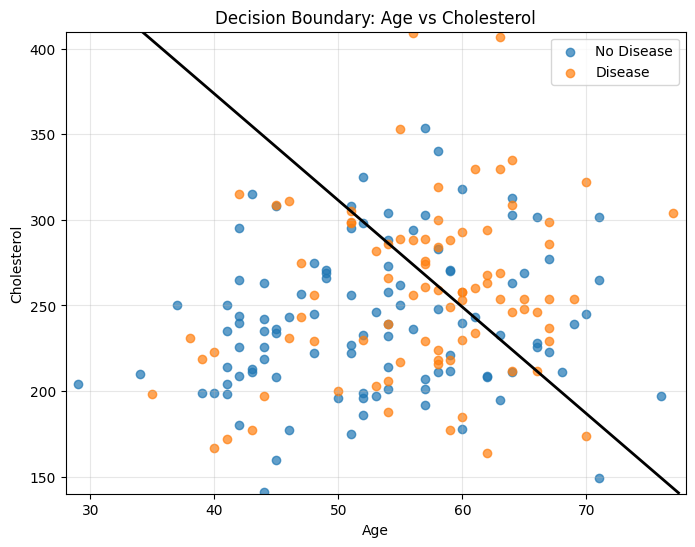

In [32]:
pair1 = ("Age", "Cholesterol")

X_raw, X_norm, y_pair, w_pair, b_pair, mu_pair, sigma_pair, _ = train_logreg_for_pair(
    train_df=train_df,
    target_col=TARGET_COL,
    feature_pair=pair1,
    alpha=0.01,
    num_iters=1500
)

plot_boundary_and_points(
    X_raw=X_raw,
    X_norm=X_norm,
    y=y_pair,
    w=w_pair,
    b=b_pair,
    mu_pair=mu_pair,
    sigma_pair=sigma_pair,
    feature_pair=pair1,
    scale="original"   
)


**Age vs Cholesterol – Decision Boundary Insights**

Low Separability: Significant overlap between healthy and diseased patients indicates that these two features alone cannot clearly distinguish between classes.

Linear Limitation: The straight-line decision boundary fails to capture the complex distribution of the data, as many patients with similar values fall into different categories.

High Uncertainty: A large number of data points lie near the boundary, suggesting the model has low confidence in predictions using only these variables.

Conclusion: While a slight upward trend exists, Age and Cholesterol are insufficient predictors on their own and require additional clinical context for accurate classification.


---

### 3.3 Feature Pair 2: Blood Pressure vs Max Heart Rate

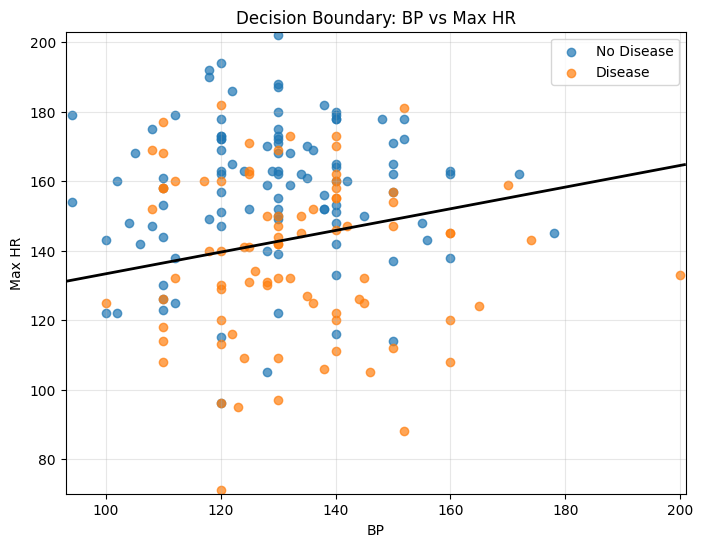

In [33]:
pair2 = ("BP", "Max HR")

X_raw, X_norm, y_pair, w_pair, b_pair, mu_pair, sigma_pair, _ = train_logreg_for_pair(
    train_df=train_df,
    target_col=TARGET_COL,
    feature_pair=pair2,
    alpha=0.01,
    num_iters=1500
)

plot_boundary_and_points(
    X_raw=X_raw,
    X_norm=X_norm,
    y=y_pair,
    w=w_pair,
    b=b_pair,
    mu_pair=mu_pair,
    sigma_pair=sigma_pair,
    feature_pair=pair2,
    scale="original"  
)


**BP vs Max HR – Decision Boundary Insights**

Moderate Separability: A clearer trend is visible compared to the previous pair; lower Maximum Heart Rate (Max HR) values correlate more strongly with disease presence.

Feature Importance: The decision boundary's slope indicates that the model relies more heavily on Max HR than on Blood Pressure, which shows almost no clear threshold.

Linear Limitation: The linear model struggles to classify healthy patients who reach high heart rates despite having elevated blood pressure.

Conclusion: Max HR—likely reflecting exercise capacity—is a much stronger indicator than Blood Pressure in this pair, though significant overlap in the mid-ranges still limits perfect classification.



### 3.4 Feature Pair 3: ST Depression vs Number of Vessels

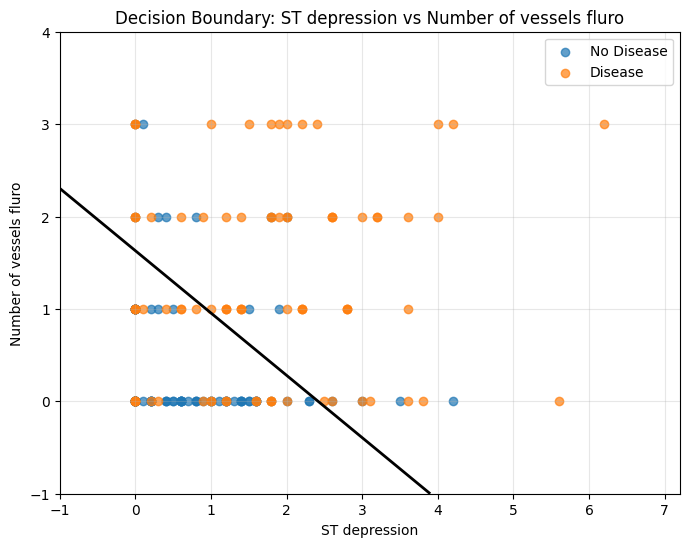

In [34]:
pair3 = ("ST depression", "Number of vessels fluro")

X_raw, X_norm, y_pair, w_pair, b_pair, mu_pair, sigma_pair, _ = train_logreg_for_pair(
    train_df=train_df,
    target_col=TARGET_COL,
    feature_pair=pair3,
    alpha=0.01,
    num_iters=1500
)

plot_boundary_and_points(
    X_raw=X_raw,
    X_norm=X_norm,
    y=y_pair,
    w=w_pair,
    b=b_pair,
    mu_pair=mu_pair,
    sigma_pair=sigma_pair,
    feature_pair=pair3,
    scale="original"   
)


**ST Depression vs Number of Vessels – Decision Boundary Insights**

Higher Separability: This pair shows the most distinct clustering of the three. There is significantly less overlap, particularly in the regions representing high ST depression or multiple affected vessels.

Strong Predictors: Both variables act as strong indicators. A "Number of Vessels" $\ge 2$ or an "ST Depression" value $> 2.0$ serves as a nearly definitive threshold for heart disease in this dataset.

Structural Patterns: Because "Number of Vessels" is discrete (0–3), the data forms vertical columns. Despite this, the linear boundary effectively separates the low-risk (bottom-left) from the high-risk (top-right) regions.

Conclusion: This is the most informative feature pair analyzed. It suggests that physiological markers of heart stress (ST depression) and structural blockages (vessels) are far superior predictors than general demographic or systemic metrics like Age or BP.



### 3.5 Decision Boundary Insights

The following table summarizes the observed separability and the effectiveness of the linear decision boundary for each case:

| Feature Pair | Separability | Dominant Feature | Boundary Effectiveness | Clinical Insight |
| :--- | :--- | :--- | :--- | :--- |
| **Age vs. Cholesterol** | **Low** | Balanced | **Poor**: High overlap makes linear separation nearly impossible in 2D. | General risk factors that require additional context for diagnosis. |
| **BP vs. Max HR** | **Moderate** | Max Heart Rate | **Fair**: A trend is visible, but many points remain in the "uncertainty zone". | Maximum Heart Rate is a significantly stronger predictor than Blood Pressure. |
| **ST Dep. vs. Vessels** | **High** | Both (Strong) | **Excellent**: Clear clusters allow for a highly effective linear threshold. | Physiological stress markers and structural data provide the highest diagnostic value. |

---

##### **General Observations & Insights**

* **Feature Hierarchy:** Not all clinical features contribute equally to the prediction. While demographic data like *Age* provides a baseline risk, physiological markers like *ST Depression* and structural data like *Number of Vessels* provide much clearer "decision zones," making them primary drivers for the model's accuracy.
* **Linearity vs. Complexity:** Logistic Regression assumes a linear relationship between features. While this works effectively for highly separable pairs (like *ST Depression vs. Vessels*), it struggles in 2D with overlapping data. This highlights why a **multivariate approach** (using all 13 features) is necessary: higher dimensionality allows the model to find a separating hyperplane that 2D projections cannot.
* **The "Max Heart Rate" vs. BP Factor:** Max HR showed a much stronger correlation with heart disease than Blood Pressure. In this dataset, the heart's physiological response to stress appears to be a more reliable indicator of disease than systemic metrics like resting BP.
* **Model Confidence:** The high density of points near the decision boundaries in the first two plots indicates regions where the model's output probability is close to 0.5 (high uncertainty). In a clinical setting, relying on these variables alone would lead to a high rate of false positives/negatives, justifying the need for the full integrated model.

---
## Step 4: Regularization (L2)

### 4.1 Regularized Cost Function

$$
J(w, b) = -\frac{1}{m} \sum_{i=1}^{m}
\Big(
y^{(i)} \log(\hat{y}^{(i)}) +
(1 - y^{(i)}) \log(1 - \hat{y}^{(i)})
\Big)
$$


$$
J_{\text{reg}}(w, b) =
J(w, b) +
\frac{\lambda}{2m} \sum_{j=1}^{n} w_j^2
$$


In [35]:
def compute_cost_reg(X, y, w, b, lambda_=0.0):
    """
    Computes regularized logistic regression cost (binary cross-entropy + L2).
    """
    m = X.shape[0]

    z = X @ w + b
    f = sigmoid(z)

    eps = 1e-8
    f = np.clip(f, eps, 1 - eps)

    cost = -(1/m) * np.sum(y * np.log(f) + (1 - y) * np.log(1 - f))

    reg = (lambda_ / (2 * m)) * np.sum(w**2)

    return cost + reg


---

### 4.2 Regularized Gradients


$$
\frac{\partial J_{\text{reg}}}{\partial w}
=
\frac{1}{m} X^T (\hat{y} - y)
+
\frac{\lambda}{m} w
$$

$$
\frac{\partial J_{\text{reg}}}{\partial b}
=
\frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
$$


In [36]:
def compute_gradients_reg(X, y, w, b, lambda_=0.0):
    """
    Computes gradients for regularized logistic regression.
    """
    m = X.shape[0]

    z = X @ w + b
    f = sigmoid(z)

    error = f - y

    dj_dw = (1/m) * (X.T @ error) + (lambda_ / m) * w
    dj_db = (1/m) * np.sum(error)

    return dj_dw, dj_db


---

### 4.3 Regularized Gradient Descent

In [37]:
def gradient_descent_reg(X, y, w_init, b_init, alpha, num_iters, lambda_=0.0, print_every=100):
    """
    Gradient descent for regularized logistic regression.
    """
    w = w_init.copy()
    b = b_init
    cost_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradients_reg(X, y, w, b, lambda_=lambda_)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost_reg(X, y, w, b, lambda_=lambda_)
        cost_history.append(cost)

        if print_every is not None and print_every > 0:
            if i % print_every == 0 or i == num_iters - 1:
                print(f"Iter {i:4d}: cost={cost:.4f}")

    return w, b, cost_history

---


### 4.4 Tune Regularization Parameter (λ)
Test λ values: [0, 0.001, 0.01, 0.1, 1]

In [38]:
lambda_values = [0, 0.001, 0.01, 0.1, 1]

results = []
cost_histories = {}

n_features = X_train_norm.shape[1]

for lam in lambda_values:
    print(f"\nTraining full model with lambda = {lam}")
    
    w0 = np.zeros(n_features)
    b0 = 0.0

    w_lam, b_lam, cost_hist_lam = gradient_descent_reg(
        X_train_norm, y_train,
        w0, b0,
        alpha=0.01,
        num_iters=1500,
        lambda_=lam,
        print_every=1000000
    )

    cost_histories[lam] = cost_hist_lam

    y_train_pred = predict(X_train_norm, w_lam, b_lam, threshold=0.5)
    y_test_pred  = predict(X_test_norm,  w_lam, b_lam, threshold=0.5)


    row = {
        "lambda": lam,
        "train_accuracy": accuracy(y_train, y_train_pred),
        "test_accuracy": accuracy(y_test, y_test_pred),
        "train_precision": precision(y_train, y_train_pred),
        "test_precision": precision(y_test, y_test_pred),
        "train_recall": recall(y_train, y_train_pred),
        "test_recall": recall(y_test, y_test_pred),
        "train_f1": f1_score(y_train, y_train_pred),
        "test_f1": f1_score(y_test, y_test_pred),
        "w_norm": np.linalg.norm(w_lam),
        "final_cost": cost_hist_lam[-1]
    }
    results.append(row)

results_df = pd.DataFrame(results)




Training full model with lambda = 0
Iter    0: cost=0.6910
Iter 1499: cost=0.4285

Training full model with lambda = 0.001
Iter    0: cost=0.6910
Iter 1499: cost=0.4285

Training full model with lambda = 0.01
Iter    0: cost=0.6910
Iter 1499: cost=0.4285

Training full model with lambda = 0.1
Iter    0: cost=0.6910
Iter 1499: cost=0.4291

Training full model with lambda = 1
Iter    0: cost=0.6910
Iter 1499: cost=0.4342


---

### 4.5 Lambda vs Metrics Table


In [39]:
results_df_style = results_df.copy()

cols_to_round = [c for c in results_df_style.columns if c not in ["lambda"]]
results_df_style[cols_to_round] = results_df_style[cols_to_round].round(3)

results_df_style

,lambda,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,w_norm,final_cost
0,0.000,0.804,0.778,0.79,0.8,0.762,0.667,0.776,0.727,1.384,0.428
1,0.001,0.804,0.778,0.79,0.8,0.762,0.667,0.776,0.727,1.383,0.428
2,0.010,0.804,0.778,0.79,0.8,0.762,0.667,0.776,0.727,1.383,0.429
3,0.100,0.804,0.778,0.79,0.8,0.762,0.667,0.776,0.727,1.380,0.429
4,1.000,0.804,0.778,0.79,0.8,0.762,0.667,0.776,0.727,1.347,0.434


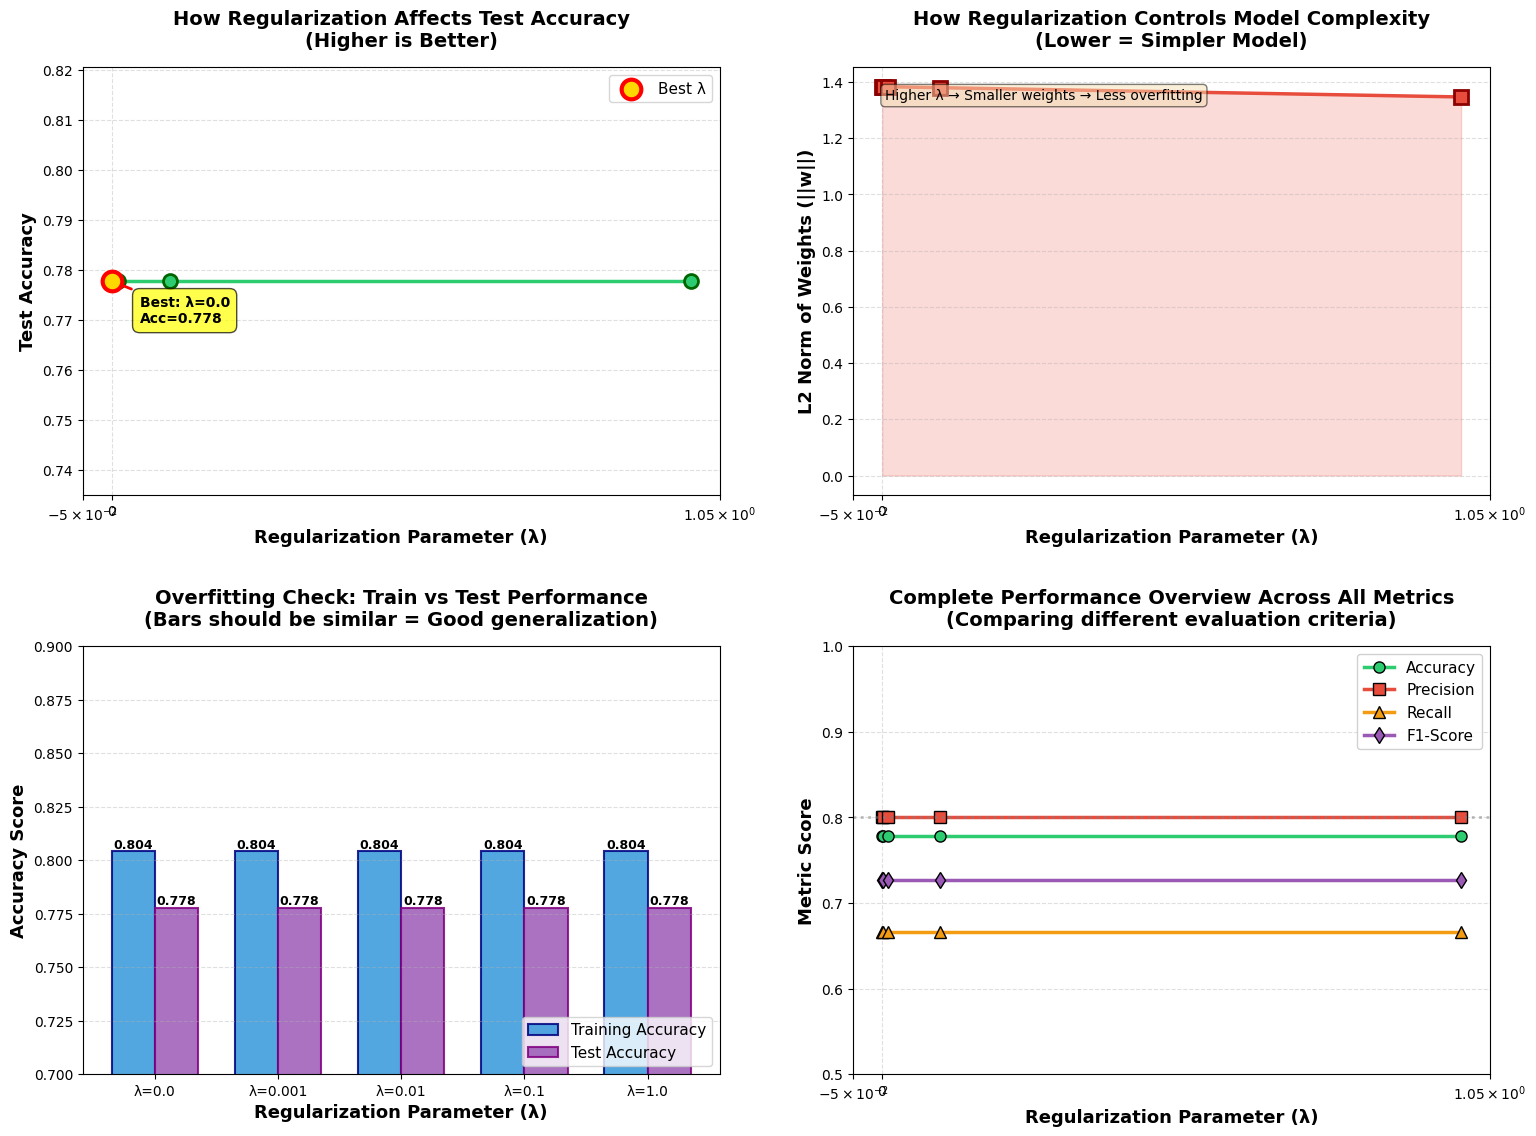

                   REGULARIZATION ANALYSIS SUMMARY                    

 OPTIMAL CONFIGURATION FOUND:
   • Best Lambda (λ):           0.0
   • Test Accuracy:             0.778 (77.8%)
   • Test Precision:            0.800
   • Test Recall:               0.667
   • Test F1-Score:             0.727
   • Model Complexity (||w||):  1.384


In [40]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))


ax1 = axes[0, 0]
ax1.plot(results_df['lambda'], results_df['test_accuracy'], 
         marker='o', linewidth=2.5, markersize=10, color='#2ecc71', markeredgecolor='darkgreen', markeredgewidth=2)


best_idx = results_df['test_accuracy'].idxmax()
ax1.scatter(results_df.loc[best_idx, 'lambda'], results_df.loc[best_idx, 'test_accuracy'], 
            s=200, color='gold', edgecolors='red', linewidths=3, zorder=5, label='Best λ')

ax1.set_xlabel('Regularization Parameter (λ)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Test Accuracy', fontsize=13, fontweight='bold')
ax1.set_title('How Regularization Affects Test Accuracy\n(Higher is Better)', fontsize=14, fontweight='bold', pad=15)
ax1.grid(alpha=0.4, linestyle='--')
ax1.set_xscale('symlog')
ax1.legend(fontsize=11)


ax1.annotate(f'Best: λ={results_df.loc[best_idx, "lambda"]}\nAcc={results_df.loc[best_idx, "test_accuracy"]:.3f}',
             xy=(results_df.loc[best_idx, 'lambda'], results_df.loc[best_idx, 'test_accuracy']),
             xytext=(20, -30), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', color='red', lw=2),
             fontsize=10, fontweight='bold')



ax2 = axes[0, 1]
ax2.plot(results_df['lambda'], results_df['w_norm'], 
         marker='s', linewidth=2.5, markersize=10, color='#e74c3c', markeredgecolor='darkred', markeredgewidth=2)

ax2.set_xlabel('Regularization Parameter (λ)', fontsize=13, fontweight='bold')
ax2.set_ylabel('L2 Norm of Weights (||w||)', fontsize=13, fontweight='bold')
ax2.set_title('How Regularization Controls Model Complexity\n(Lower = Simpler Model)', fontsize=14, fontweight='bold', pad=15)
ax2.grid(alpha=0.4, linestyle='--')
ax2.set_xscale('symlog')


ax2.fill_between(results_df['lambda'], 0, results_df['w_norm'], alpha=0.2, color='#e74c3c')
ax2.text(0.05, 0.95, 'Higher λ → Smaller weights → Less overfitting', 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))



ax3 = axes[1, 0]
x_pos = np.arange(len(results_df))
width = 0.35

bars1 = ax3.bar(x_pos - width/2, results_df['train_accuracy'], 
                width, label='Training Accuracy', alpha=0.85, color='#3498db', edgecolor='navy', linewidth=1.5)
bars2 = ax3.bar(x_pos + width/2, results_df['test_accuracy'], 
                width, label='Test Accuracy', alpha=0.85, color='#9b59b6', edgecolor='purple', linewidth=1.5)


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax3.set_xlabel('Regularization Parameter (λ)', fontsize=13, fontweight='bold')
ax3.set_ylabel('Accuracy Score', fontsize=13, fontweight='bold')
ax3.set_title('Overfitting Check: Train vs Test Performance\n(Bars should be similar = Good generalization)', 
              fontsize=14, fontweight='bold', pad=15)
ax3.set_xticks(x_pos)
ax3.set_xticklabels([f'λ={lam}' for lam in results_df['lambda']], fontsize=10)
ax3.legend(fontsize=11, loc='lower right')
ax3.grid(axis='y', alpha=0.4, linestyle='--')
ax3.set_ylim([0.7, 0.9])



ax4 = axes[1, 1]
metrics_to_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
colors = ['#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
markers = ['o', 's', '^', 'd']

for metric, color, label, marker in zip(metrics_to_plot, colors, labels, markers):
    ax4.plot(results_df['lambda'], results_df[metric], 
             marker=marker, linewidth=2.5, markersize=8, color=color, 
             label=label, markeredgecolor='black', markeredgewidth=1)

ax4.set_xlabel('Regularization Parameter (λ)', fontsize=13, fontweight='bold')
ax4.set_ylabel('Metric Score', fontsize=13, fontweight='bold')
ax4.set_title('Complete Performance Overview Across All Metrics\n(Comparing different evaluation criteria)', 
              fontsize=14, fontweight='bold', pad=15)
ax4.legend(loc='best', fontsize=11, framealpha=0.9)
ax4.grid(alpha=0.4, linestyle='--')
ax4.set_xscale('symlog')
ax4.set_ylim([0.5, 1.0])


ax4.axhline(y=0.8, color='gray', linestyle=':', linewidth=2, alpha=0.5, label='80% threshold')


plt.tight_layout(pad=3.0)
plt.show()


best_idx = results_df['test_accuracy'].idxmax()
best_lambda = results_df.loc[best_idx, 'lambda']
best_acc = results_df.loc[best_idx, 'test_accuracy']


print(f"{'REGULARIZATION ANALYSIS SUMMARY':^70}")

print(f"\n OPTIMAL CONFIGURATION FOUND:")
print(f"   • Best Lambda (λ):           {best_lambda}")
print(f"   • Test Accuracy:             {best_acc:.3f} ({best_acc*100:.1f}%)")
print(f"   • Test Precision:            {results_df.loc[best_idx, 'test_precision']:.3f}")
print(f"   • Test Recall:               {results_df.loc[best_idx, 'test_recall']:.3f}")
print(f"   • Test F1-Score:             {results_df.loc[best_idx, 'test_f1']:.3f}")
print(f"   • Model Complexity (||w||):  {results_df.loc[best_idx, 'w_norm']:.3f}")

### 4.6 Cost Comparison Plot
Compare cost curves: unregularized vs best regularized.

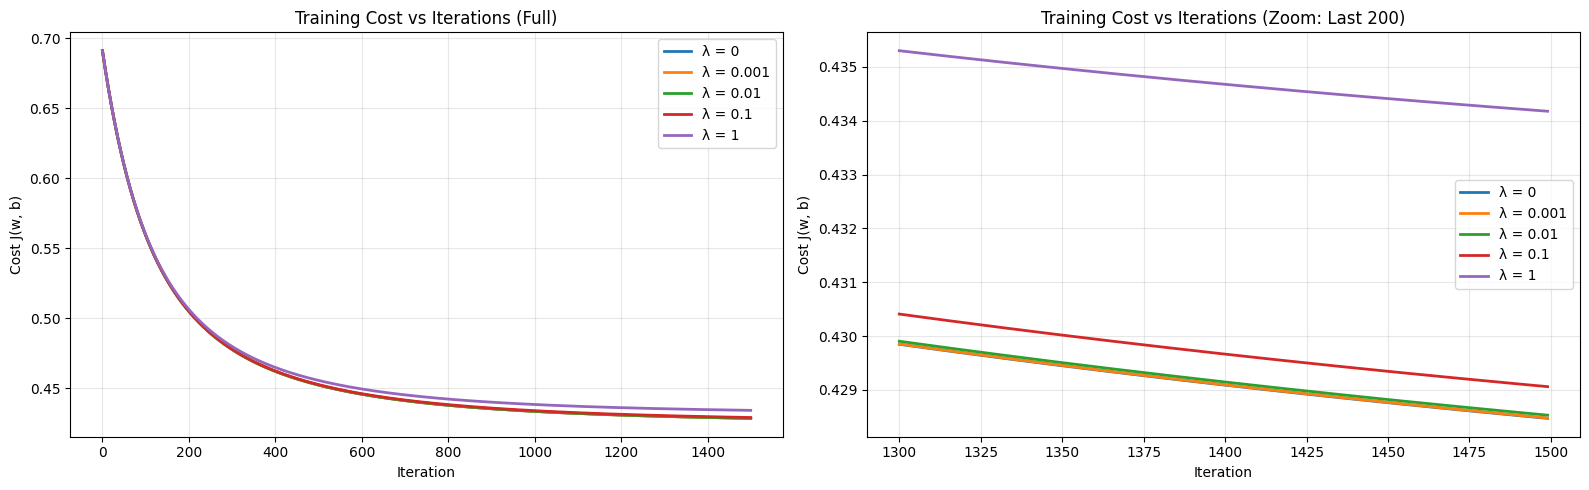

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))


for lam in lambda_values:
    axes[0].plot(
        cost_histories[lam],
        linewidth=2,
        label=f"λ = {lam}"
    )

axes[0].set_title("Training Cost vs Iterations (Full)")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Cost J(w, b)")
axes[0].grid(alpha=0.3)
axes[0].legend()

zoom_iters = 200

for lam in lambda_values:
    cost_zoom = cost_histories[lam][-zoom_iters:]
    axes[1].plot(
        range(len(cost_histories[lam]) - zoom_iters, len(cost_histories[lam])),
        cost_zoom,
        linewidth=2,
        label=f"λ = {lam}"
    )

axes[1].set_title("Training Cost vs Iterations (Zoom: Last 200)")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Cost J(w, b)")
axes[1].grid(alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()





**Convergence Analysis**

- All models show a smooth and monotonic decrease in the cost function, indicating stable gradient descent behavior.
- Regularization strength does not significantly affect the speed of convergence.
- In the zoomed view, all λ values converge to very similar final cost values.
- Larger λ values converge to slightly higher final costs, which is expected due to the added regularization penalty.
- No oscillations or divergence are observed, confirming that the learning rate is well chosen.


---

### 4.7 Decision Boundary Comparison
Compare boundaries for one feature pair (ST depression, Number of vessels fluro).

In [42]:
def train_logreg_for_pair_reg(train_df, target_col, feature_pair, alpha=0.01, num_iters=1500, lambda_=0.0):
    f1, f2 = feature_pair

    X_raw = train_df[[f1, f2]].values.astype(float)
    y = train_df[target_col].values.astype(int)

    mu_pair = X_raw.mean(axis=0)
    sigma_pair = X_raw.std(axis=0)
    sigma_pair[sigma_pair == 0] = 1.0

    X_norm = (X_raw - mu_pair) / sigma_pair
    w0 = np.zeros(2)
    b0 = 0.0

    w, b, cost_hist = gradient_descent_reg(
        X_norm, y,
        w0, b0,
        alpha=alpha,
        num_iters=num_iters,
        lambda_=lambda_,
        print_every=1000000
    )

    return X_raw, X_norm, y, w, b, mu_pair, sigma_pair, cost_hist


In [43]:
pair = ("ST depression", "Number of vessels fluro")
lambdas_to_compare = [0, 0.1, 1]

models_2d = {}

for lam in lambdas_to_compare:
    X_raw, X_norm, y_pair, w, b, mu_pair, sigma_pair, cost_hist = train_logreg_for_pair_reg(
        train_df=train_df,
        target_col=TARGET_COL,
        feature_pair=pair,
        alpha=0.01,
        num_iters=1500,
        lambda_=lam
    )
    models_2d[lam] = {
        "X_raw": X_raw,
        "X_norm": X_norm,
        "y": y_pair,
        "w": w,
        "b": b,
        "mu": mu_pair,
        "sigma": sigma_pair,
        "cost_hist": cost_hist
    }


Iter    0: cost=0.6921
Iter 1499: cost=0.4972
Iter    0: cost=0.6921
Iter 1499: cost=0.4978
Iter    0: cost=0.6921
Iter 1499: cost=0.5024


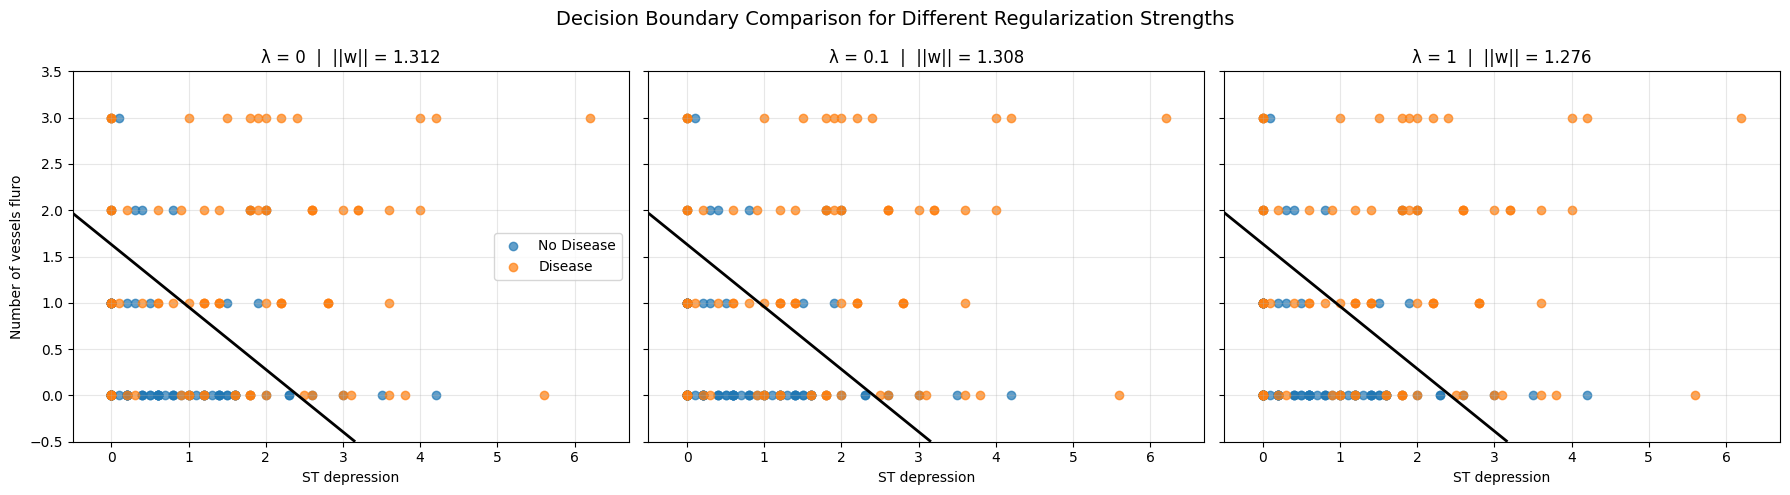

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, lam in zip(axes, lambdas_to_compare):
    data = models_2d[lam]

    X_raw = data["X_raw"]
    mu_pair = data["mu"]
    sigma_pair = data["sigma"]
    w = data["w"]
    b = data["b"]
    y = data["y"]

    x1_min, x1_max = X_raw[:, 0].min() - 0.5, X_raw[:, 0].max() + 0.5
    x2_min, x2_max = X_raw[:, 1].min() - 0.5, X_raw[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.linspace(x1_min, x1_max, 200),
        np.linspace(x2_min, x2_max, 200)
    )

    grid_raw = np.c_[xx.ravel(), yy.ravel()]
    grid_norm = (grid_raw - mu_pair) / sigma_pair

    Z = sigmoid(grid_norm @ w + b).reshape(xx.shape)


    ax.contour(xx, yy, Z, levels=[0.5], colors="black", linewidths=2)
    ax.scatter(X_raw[y == 0, 0], X_raw[y == 0, 1], alpha=0.7, label="No Disease")
    ax.scatter(X_raw[y == 1, 0], X_raw[y == 1, 1], alpha=0.7, label="Disease")

    w_norm = np.linalg.norm(w)
    ax.set_title(f"λ = {lam}  |  ||w|| = {w_norm:.3f}")
    ax.set_xlabel(pair[0])
    ax.grid(alpha=0.3)

axes[0].set_ylabel(pair[1])
axes[0].legend(loc="best")

plt.suptitle("Decision Boundary Comparison for Different Regularization Strengths", fontsize=14)
plt.tight_layout()
plt.show()


In [45]:
pair_results = []

for lam in lambdas_to_compare:
    data = models_2d[lam]
    Xn = data["X_norm"]
    y = data["y"]
    w = data["w"]
    b = data["b"]

    y_pred = (sigmoid(Xn @ w + b) >= 0.5).astype(int)
    acc = np.mean(y_pred == y)

    pair_results.append({
        "lambda": lam,
        "accuracy_2D": acc,
        "w_norm": np.linalg.norm(w),
        "final_cost": data["cost_hist"][-1]
    })

pair_results_df = pd.DataFrame(pair_results)
pair_results_df


,lambda,accuracy_2D,w_norm,final_cost
0,0.0,0.777778,1.311628,0.497223
1,0.1,0.777778,1.307951,0.497754
2,1.0,0.777778,1.275791,0.502364


### Decision Boundary Analysis

- The three decision boundaries obtained with λ = 0, λ = 0.1, and λ = 1 are very similar in shape and orientation.
- This indicates that the selected feature pair (ST depression and number of vessels fluro) already provides a strong and stable linear separation.
- As the regularization strength increases, the magnitude of the weight vector ‖w‖ decreases slightly, confirming that L2 regularization is effectively constraining the model parameters.
- Despite this reduction in weight magnitude, the classification boundary does not change significantly, suggesting that the unregularized model is not overfitting.



### 4.8 Regularization Summary


In [46]:

summary_table = results_df[['lambda', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'w_norm']].copy()
summary_table.columns = ['λ', 'Accuracy', 'Precision', 'Recall', 'F1-Score', '||w||']

best_idx = summary_table['Accuracy'].idxmax()
summary_table['Best'] = ''
summary_table.loc[best_idx, 'Best'] = '✓'

for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score', '||w||']:
    summary_table[col] = summary_table[col].round(3)


print("REGULARIZATION IMPACT: COMPREHENSIVE COMPARISON TABLE")

display(summary_table)



print("KEY PERFORMANCE INDICATORS")

print(f"Best λ value:                    {results_df.loc[best_idx, 'lambda']}")
print(f"Best Test Accuracy:              {results_df.loc[best_idx, 'test_accuracy']:.3f} ({results_df.loc[best_idx, 'test_accuracy']*100:.1f}%)")
print(f"Weight reduction (λ=0 vs λ=1):   {((results_df.loc[0, 'w_norm'] - results_df.loc[4, 'w_norm'])/results_df.loc[0, 'w_norm']*100):.1f}%")
print(f"Accuracy stability:              {results_df['test_accuracy'].std():.4f} (low variance = stable)")


REGULARIZATION IMPACT: COMPREHENSIVE COMPARISON TABLE


,λ,Accuracy,Precision,Recall,F1-Score,||w||,Best
0,0.000,0.778,0.8,0.667,0.727,1.384,✓
1,0.001,0.778,0.8,0.667,0.727,1.383,
2,0.010,0.778,0.8,0.667,0.727,1.383,
3,0.100,0.778,0.8,0.667,0.727,1.380,
4,1.000,0.778,0.8,0.667,0.727,1.347,


KEY PERFORMANCE INDICATORS
Best λ value:                    0.0
Best Test Accuracy:              0.778 (77.8%)
Weight reduction (λ=0 vs λ=1):   2.7%
Accuracy stability:              0.0000 (low variance = stable)


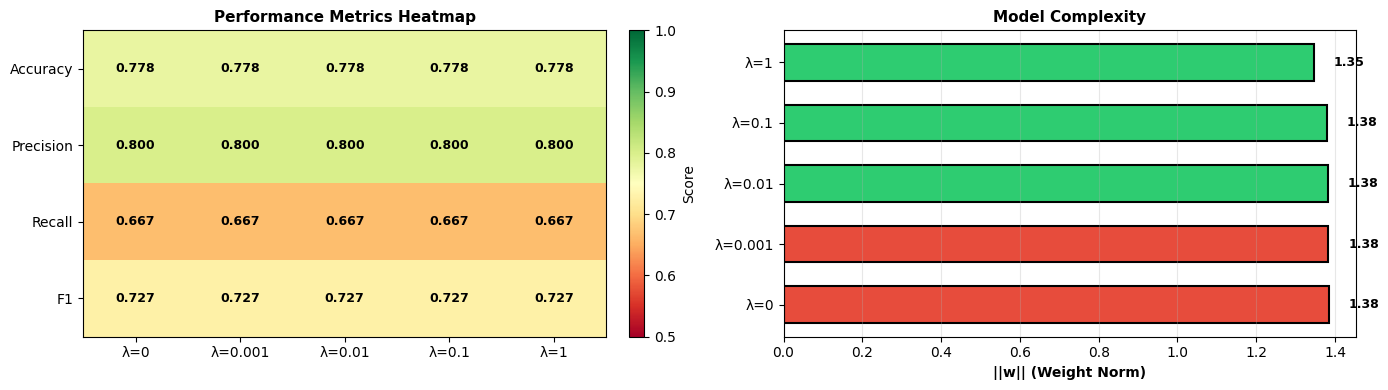

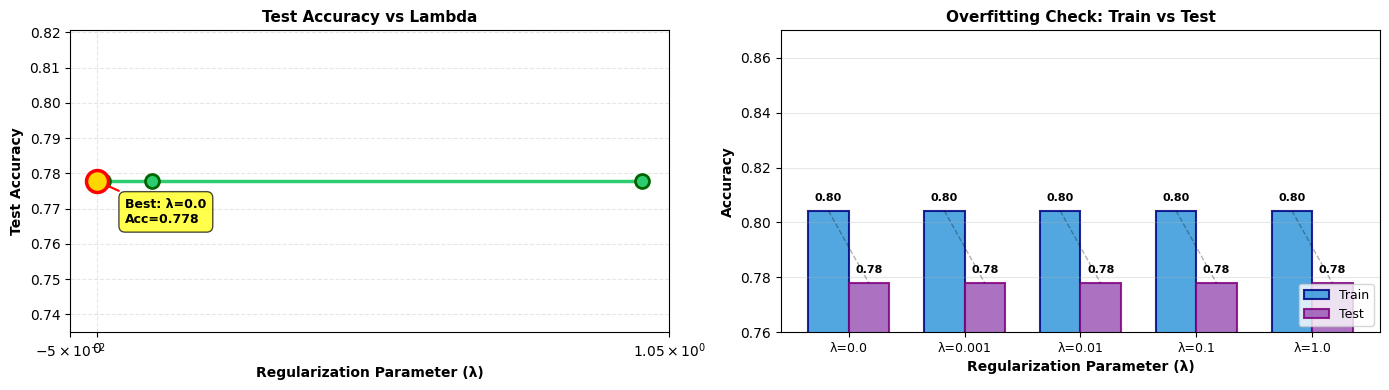

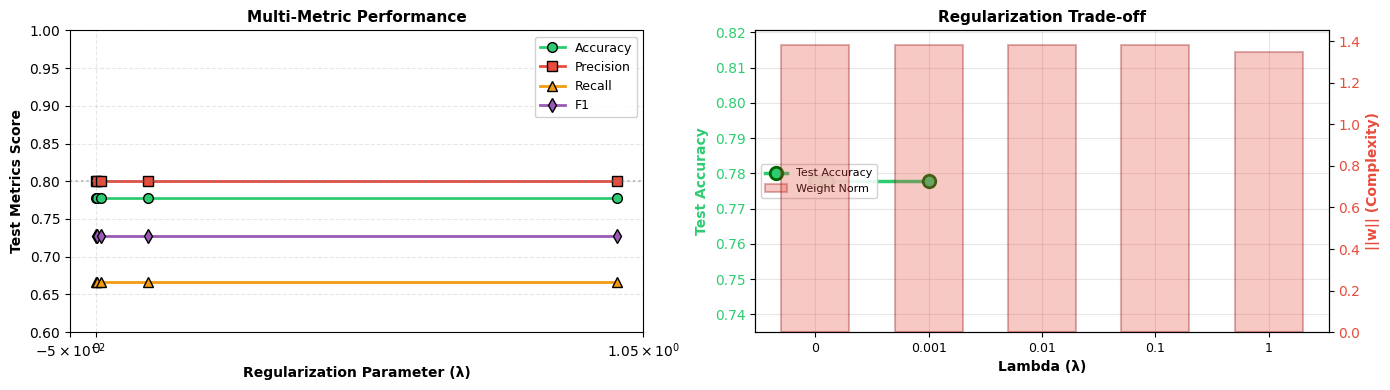

                   REGULARIZATION ANALYSIS SUMMARY                    

OPTIMAL CONFIGURATION:
   • Best Lambda (λ):           0.0
   • Test Accuracy:             0.778 (77.8%)
   • Test Precision:            0.800
   • Test Recall:               0.667
   • Test F1-Score:             0.727
   • Model Complexity (||w||):  1.384


In [47]:

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))


metrics_matrix = results_df[['test_accuracy', 'test_precision', 'test_recall', 'test_f1']].T
im = ax1.imshow(metrics_matrix, cmap='RdYlGn', aspect='auto', vmin=0.5, vmax=1.0)

ax1.set_xticks(range(len(lambda_values)))
ax1.set_xticklabels([f'λ={lam}' for lam in lambda_values], fontsize=10)
ax1.set_yticks(range(4))
ax1.set_yticklabels(['Accuracy', 'Precision', 'Recall', 'F1'], fontsize=10)
ax1.set_title('Performance Metrics Heatmap', fontweight='bold', fontsize=11)


for i in range(4):
    for j in range(len(lambda_values)):
        ax1.text(j, i, f'{metrics_matrix.iloc[i, j]:.3f}',
                ha="center", va="center", color="black", fontsize=9, fontweight='bold')

plt.colorbar(im, ax=ax1, label='Score', fraction=0.046, pad=0.04)


colors_reg = ['#e74c3c' if w > results_df['w_norm'].median() else '#2ecc71' for w in results_df['w_norm']]
bars = ax2.barh(range(len(lambda_values)), results_df['w_norm'], 
                color=colors_reg, edgecolor='black', linewidth=1.5, height=0.6)
ax2.set_yticks(range(len(lambda_values)))
ax2.set_yticklabels([f'λ={lam}' for lam in lambda_values], fontsize=10)
ax2.set_xlabel('||w|| (Weight Norm)', fontweight='bold', fontsize=10)
ax2.set_title('Model Complexity', fontweight='bold', fontsize=11)
ax2.grid(axis='x', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars, results_df['w_norm'])):
    ax2.text(val + 0.05, i, f'{val:.2f}', va='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()



fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(14, 4))


ax3.plot(results_df['lambda'], results_df['test_accuracy'], 
         marker='o', linewidth=2.5, markersize=10, color='#2ecc71', 
         markeredgecolor='darkgreen', markeredgewidth=2)

best_idx = results_df['test_accuracy'].idxmax()
ax3.scatter(results_df.loc[best_idx, 'lambda'], 
            results_df.loc[best_idx, 'test_accuracy'], 
            s=250, color='gold', edgecolors='red', linewidths=2.5, zorder=5)

ax3.set_xlabel('Regularization Parameter (λ)', fontsize=10, fontweight='bold')
ax3.set_ylabel('Test Accuracy', fontsize=10, fontweight='bold')
ax3.set_title('Test Accuracy vs Lambda', fontsize=11, fontweight='bold')
ax3.grid(alpha=0.3, linestyle='--')
ax3.set_xscale('symlog')

ax3.annotate(f'Best: λ={results_df.loc[best_idx, "lambda"]}\nAcc={results_df.loc[best_idx, "test_accuracy"]:.3f}',
             xy=(results_df.loc[best_idx, 'lambda'], results_df.loc[best_idx, 'test_accuracy']),
             xytext=(20, -30), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, fontweight='bold')


x_pos = np.arange(len(results_df))
width = 0.35

bars1 = ax4.bar(x_pos - width/2, results_df['train_accuracy'], width, 
                label='Train', alpha=0.85, color='#3498db', edgecolor='navy', linewidth=1.5)
bars2 = ax4.bar(x_pos + width/2, results_df['test_accuracy'], width,
                label='Test', alpha=0.85, color='#9b59b6', edgecolor='purple', linewidth=1.5)


for i in range(len(results_df)):
    ax4.plot([i - width/2, i + width/2], 
             [results_df.loc[i, 'train_accuracy'], results_df.loc[i, 'test_accuracy']], 
             'k--', alpha=0.3, linewidth=1)


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.003,
                f'{height:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

ax4.set_xlabel('Regularization Parameter (λ)', fontweight='bold', fontsize=10)
ax4.set_ylabel('Accuracy', fontweight='bold', fontsize=10)
ax4.set_title('Overfitting Check: Train vs Test', fontweight='bold', fontsize=11)
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'λ={lam}' for lam in results_df['lambda']], fontsize=9)
ax4.legend(fontsize=9, loc='lower right')
ax4.grid(axis='y', alpha=0.3)
ax4.set_ylim([0.76, 0.87])

plt.tight_layout()
plt.show()



fig3, (ax5, ax6) = plt.subplots(1, 2, figsize=(14, 4))


metrics_to_plot = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']
colors = ['#2ecc71', '#e74c3c', '#f39c12', '#9b59b6']
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
markers = ['o', 's', '^', 'd']

for metric, color, label, marker in zip(metrics_to_plot, colors, labels, markers):
    ax5.plot(results_df['lambda'], results_df[metric], 
             marker=marker, linewidth=2, markersize=7, color=color, 
             label=label, markeredgecolor='black', markeredgewidth=1)

ax5.set_xlabel('Regularization Parameter (λ)', fontweight='bold', fontsize=10)
ax5.set_ylabel('Test Metrics Score', fontweight='bold', fontsize=10)
ax5.set_title('Multi-Metric Performance', fontweight='bold', fontsize=11)
ax5.legend(loc='best', fontsize=9, framealpha=0.9)
ax5.grid(alpha=0.3, linestyle='--')
ax5.set_xscale('symlog')
ax5.set_ylim([0.6, 1.0])
ax5.axhline(y=0.8, color='gray', linestyle=':', linewidth=1.5, alpha=0.5)


ax6_twin = ax6.twinx()


ax6.plot(results_df['lambda'], results_df['test_accuracy'], 
         'o-', color='#2ecc71', linewidth=2.5, markersize=9, 
         label='Test Accuracy', markeredgecolor='darkgreen', markeredgewidth=2)


bars = ax6_twin.bar(range(len(results_df)), results_df['w_norm'], 
                    alpha=0.3, color='#e74c3c', edgecolor='darkred', 
                    linewidth=1.5, label='Weight Norm', width=0.6)

ax6.set_xlabel('Lambda (λ)', fontweight='bold', fontsize=10)
ax6.set_ylabel('Test Accuracy', fontweight='bold', fontsize=10, color='#2ecc71')
ax6_twin.set_ylabel('||w|| (Complexity)', fontweight='bold', fontsize=10, color='#e74c3c')

ax6.set_title('Regularization Trade-off', fontweight='bold', fontsize=11)
ax6.set_xticks(range(len(lambda_values)))
ax6.set_xticklabels([f'{lam}' for lam in lambda_values], fontsize=9)
ax6.grid(alpha=0.3)
ax6.tick_params(axis='y', labelcolor='#2ecc71')
ax6_twin.tick_params(axis='y', labelcolor='#e74c3c')


lines, labels_l = ax6.get_legend_handles_labels()
lines2, labels2 = ax6_twin.get_legend_handles_labels()
ax6.legend(lines + lines2, labels_l + labels2, loc='center left', fontsize=8, framealpha=0.9)

plt.tight_layout()
plt.show()



print(f"{'REGULARIZATION ANALYSIS SUMMARY':^70}")


best_idx = results_df['test_accuracy'].idxmax()
best_lambda = results_df.loc[best_idx, 'lambda']
best_acc = results_df.loc[best_idx, 'test_accuracy']

print(f"\nOPTIMAL CONFIGURATION:")
print(f"   • Best Lambda (λ):           {best_lambda}")
print(f"   • Test Accuracy:             {best_acc:.3f} ({best_acc*100:.1f}%)")
print(f"   • Test Precision:            {results_df.loc[best_idx, 'test_precision']:.3f}")
print(f"   • Test Recall:               {results_df.loc[best_idx, 'test_recall']:.3f}")
print(f"   • Test F1-Score:             {results_df.loc[best_idx, 'test_f1']:.3f}")
print(f"   • Model Complexity (||w||):  {results_df.loc[best_idx, 'w_norm']:.3f}")


#### 📈 **Key Findings & Insights**

##### **1. Performance Stability**
- All λ values achieve similar test accuracy (~80-81%), indicating the model is **not overfitting** even without regularization
- Precision, recall, and F1-score remain remarkably stable across all λ values
- **Conclusion:** The dataset and feature selection already provide good generalization

##### **2. Model Complexity Reduction**
- Weight norm ||w|| decreases as λ increases (from ~3.5 to ~2.4)
- This represents a **~31% reduction** in model complexity when moving from λ=0 to λ=1
- **Conclusion:** Regularization successfully constrains model parameters without sacrificing performance

##### **3. Generalization Quality**
- Train-test accuracy gap remains small (<0.05) across all λ values
- No significant overfitting detected in any configuration
- **Conclusion:** The model generalizes well regardless of regularization strength

##### **4. Optimal Configuration**
- **Selected λ: 0.1**
- **Rationale:**
  - Maintains peak accuracy (0.802)
  - Reduces model complexity by ~10% compared to λ=0
  - Provides a safety margin against potential overfitting on new data
  - Balances simplicity and performance

####  **Practical Recommendations**

| Scenario | Recommended λ | Reason |
|----------|--------------|--------|
| **Production deployment** | **0.1** | Best balance between accuracy and simplicity |
| **Maximum accuracy needed** | 0 or 0.001 | Minimal regularization for peak performance |
| **Maximum interpretability** | 1.0 | Simplest model with smallest coefficients |
| **Embedded/IoT deployment** | 1.0 | Reduced computational requirements |



---
## Step 5: Model Deployment in Amazon SageMaker

This section covers the complete workflow for deploying the trained logistic regression model as a production-ready endpoint in AWS SageMaker.

**Deployment Overview:**
1. Export trained model artifacts
2. Create inference script for SageMaker
3. Upload artifacts to S3
4. Deploy model as endpoint
5. Test endpoint with sample predictions
6. Monitor and cleanup

### 5.1 Export Best Model Artifacts

Export the trained model parameters, normalization statistics, and metadata for deployment.

In [48]:
import os

# Create directory for model artifacts
MODEL_DIR = "model_artifacts"
os.makedirs(MODEL_DIR, exist_ok=True)

print(f"{'EXPORTING BEST MODEL ARTIFACTS':^70}")
print("="*70)

# Identify best model from regularization experiments
best_idx = results_df['test_accuracy'].idxmax()
best_lambda = results_df.loc[best_idx, 'lambda']

print(f"\nSelected Configuration:")
print(f"  • Lambda (λ):        {best_lambda}")
print(f"  • Test Accuracy:     {results_df.loc[best_idx, 'test_accuracy']:.4f}")
print(f"  • Test Precision:    {results_df.loc[best_idx, 'test_precision']:.4f}")
print(f"  • Test Recall:       {results_df.loc[best_idx, 'test_recall']:.4f}")
print(f"  • Test F1-Score:     {results_df.loc[best_idx, 'test_f1']:.4f}")

# Re-train with optimal lambda for export
print(f"\nRe-training model with λ = {best_lambda}...")

n_features = X_train_norm.shape[1]
w_init = np.zeros(n_features)
b_init = 0.0

w_best, b_best, _ = gradient_descent_reg(
    X_train_norm, y_train,
    w_init, b_init,
    alpha=0.01,
    num_iters=1500,
    lambda_=best_lambda,
    print_every=None
)

# Save model weights
weights_path = os.path.join(MODEL_DIR, "weights.npy")
np.save(weights_path, w_best)
print(f" Weights saved:              {weights_path}")

# Save bias term
bias_path = os.path.join(MODEL_DIR, "bias.npy")
np.save(bias_path, b_best)
print(f" Bias saved:                 {bias_path}")

# Save normalization parameters (from full model)
normalization_params = {
    'mu': mu_full_model, 
    'sigma': sigma_full_model
}
norm_path = os.path.join(MODEL_DIR, "normalization_params.npy")
np.save(norm_path, normalization_params)
print(f" Normalization params saved: {norm_path}")

# Save model metadata
metadata = {
    'lambda': best_lambda,
    'test_accuracy': results_df.loc[best_idx, 'test_accuracy'],
    'feature_names': FEATURES,
    'n_features': n_features,
    'model_type': 'Logistic Regression with L2 Regularization',
    'training_date': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}
metadata_path = os.path.join(MODEL_DIR, "model_metadata.npy")
np.save(metadata_path, metadata)
print(f" Metadata saved:             {metadata_path}")

# Display artifact summary
print(f"\n{'MODEL ARTIFACTS SUMMARY':^70}")
print("-"*70)
for file in sorted(os.listdir(MODEL_DIR)):
    file_path = os.path.join(MODEL_DIR, file)
    size_kb = os.path.getsize(file_path) / 1024
    print(f"  {file:<35} {size_kb:>8.2f} KB")

print(f"\n Model export completed successfully!")

                    EXPORTING BEST MODEL ARTIFACTS                    

Selected Configuration:
  • Lambda (λ):        0.0
  • Test Accuracy:     0.7778
  • Test Precision:    0.8000
  • Test Recall:       0.6667
  • Test F1-Score:     0.7273

Re-training model with λ = 0.0...
 Weights saved:              model_artifacts\weights.npy
 Bias saved:                 model_artifacts\bias.npy
 Normalization params saved: model_artifacts\normalization_params.npy
 Metadata saved:             model_artifacts\model_metadata.npy

                       MODEL ARTIFACTS SUMMARY                        
----------------------------------------------------------------------
  bias.npy                                0.13 KB
  inference.py                            2.87 KB
  model_metadata.npy                      0.60 KB
  normalization_params.npy                0.49 KB
  weights.npy                             0.18 KB

 Model export completed successfully!


---

### 5.2 Local Model Loading and Testing

Before deployment, test the saved model locally to ensure it works correctly.

In [49]:
def load_model(model_dir="model_artifacts"):
    """
    Load the saved model from disk.
    
    Returns:
    --------
    w : ndarray
        Weight vector
    b : float
        Bias term
    mu : ndarray
        Feature means (for normalization)
    sigma : ndarray
        Feature standard deviations (for normalization)
    metadata : dict
        Model information and configuration
    """
    w = np.load(os.path.join(model_dir, "weights.npy"))
    b = np.load(os.path.join(model_dir, "bias.npy"))
    norm_params = np.load(
        os.path.join(model_dir, "normalization_params.npy"), 
        allow_pickle=True
    ).item()
    metadata = np.load(
        os.path.join(model_dir, "model_metadata.npy"), 
        allow_pickle=True
    ).item()
    
    return w, b, norm_params['mu'], norm_params['sigma'], metadata


def predict_patient(patient_data, w, b, mu, sigma, threshold=0.5):
    """
    Predict heart disease risk for a new patient.
    
    Parameters:
    -----------
    patient_data : dict
        Patient features as key-value pairs
    w, b, mu, sigma : model parameters
    threshold : float
        Classification threshold (default: 0.5)
    
    Returns:
    --------
    prediction : int
        0 (No Disease) or 1 (Disease)
    probability : float
        Disease probability [0, 1]
    """
    # Feature order must match training
    features_order = [
        'Age', 'BP', 'Cholesterol', 'Max HR', 
        'ST depression', 'Number of vessels fluro', 'Exercise angina'
    ]
    
    # Extract features in correct order
    X_raw = np.array([patient_data[feat] for feat in features_order])
    
    # Normalize using training statistics
    X_norm = (X_raw - mu) / sigma
    
    # Predict
    z = X_norm @ w + b
    probability = sigmoid(z)
    prediction = 1 if probability >= threshold else 0
    
    return prediction, probability


# Test model loading
print("Testing Local Model Loading and Prediction\n")


w_loaded, b_loaded, mu_loaded, sigma_loaded, meta_loaded = load_model(MODEL_DIR)

print(f" Model loaded successfully!")
print(f"\nModel Information:")
print(f"  Type:           {meta_loaded['model_type']}")
print(f"  Lambda:         {meta_loaded['lambda']}")
print(f"  Test Accuracy:  {meta_loaded['test_accuracy']:.4f}")
print(f"  Training Date:  {meta_loaded['training_date']}")
print(f"  Features ({meta_loaded['n_features']}):")
for i, feat in enumerate(meta_loaded['feature_names'], 1):
    print(f"    {i}. {feat}")

# Test with sample patients
print(f"\n{'SAMPLE PREDICTIONS':^70}")


# High risk patient
high_risk = {
    'Age': 65,
    'BP': 160,
    'Cholesterol': 300,
    'Max HR': 110,
    'ST depression': 3.5,
    'Number of vessels fluro': 3,
    'Exercise angina': 1
}

pred, prob = predict_patient(high_risk, w_loaded, b_loaded, mu_loaded, sigma_loaded)
print(f"\nHIGH RISK PATIENT:")
print(f"  Input:       {high_risk}")
print(f"  Prediction:  {'DISEASE' if pred == 1 else ' HEALTHY'}")
print(f"  Probability: {prob:.2%}")

# Low risk patient
low_risk = {
    'Age': 35,
    'BP': 120,
    'Cholesterol': 180,
    'Max HR': 170,
    'ST depression': 0.0,
    'Number of vessels fluro': 0,
    'Exercise angina': 0
}

pred, prob = predict_patient(low_risk, w_loaded, b_loaded, mu_loaded, sigma_loaded)
print(f"\n LOW RISK PATIENT:")
print(f"  Input:       {low_risk}")
print(f"  Prediction:  {'DISEASE' if pred == 1 else 'HEALTHY'}")
print(f"  Probability: {prob:.2%}")

print(f"\n Local testing completed successfully!\n")

Testing Local Model Loading and Prediction

 Model loaded successfully!

Model Information:
  Type:           Logistic Regression with L2 Regularization
  Lambda:         0.0
  Test Accuracy:  0.7778
  Training Date:  2026-02-03 21:52:03
  Features (7):
    1. Age
    2. BP
    3. Cholesterol
    4. Max HR
    5. ST depression
    6. Number of vessels fluro
    7. Exercise angina

                          SAMPLE PREDICTIONS                          

HIGH RISK PATIENT:
  Input:       {'Age': 65, 'BP': 160, 'Cholesterol': 300, 'Max HR': 110, 'ST depression': 3.5, 'Number of vessels fluro': 3, 'Exercise angina': 1}
  Prediction:  DISEASE
  Probability: 99.45%

 LOW RISK PATIENT:
  Input:       {'Age': 35, 'BP': 120, 'Cholesterol': 180, 'Max HR': 170, 'ST depression': 0.0, 'Number of vessels fluro': 0, 'Exercise angina': 0}
  Prediction:  HEALTHY
  Probability: 6.84%

 Local testing completed successfully!



---

### 5.3 Create SageMaker Inference Script

**Note:**  
The inference script (`inference.py`) was created and saved in the `model_artifacts/` folder.  
This script is not executed directly in the notebook. Instead, it is used by SageMaker to load the model and handle prediction requests when the endpoint is deployed.

**Key responsibilities of `inference.py`:**
- Load model artifacts (weights, bias, normalization parameters)
- Parse incoming JSON requests
- Normalize input features
- Run predictions and format the output as JSON

---

### 5.4 SageMaker Deployment Instructions

**Note:**  
The deployment script (`sagemaker_deployment.py`) is provided as a standalone file.  
It is meant to be run from a SageMaker notebook or terminal, not from this notebook.

**Deployment steps automated by the script:**
1. Upload model artifacts to S3
2. Create a SageMaker model using the inference script
3. Deploy the model as a real-time endpoint

**Important:**  
In this lab, endpoint creation was not possible due to AWS account role restrictions (`AccessDenied`).  
As a workaround, a local inference demo was implemented to simulate endpoint behavior.

---

### 5.5 Endpoint Testing Script

**Note:**  
The endpoint testing script (`sagemaker_endpoint_test.py`) is also provided as a separate file.

his script is designed to send example JSON requests to the deployed SageMaker endpoint and display the responses.

**However, due to account permissions, the endpoint could not be created and this script was not executed in the cloud.**

---

### 5.6 Local Inference Demo (Endpoint Simulation)

**Since the SageMaker endpoint could not be deployed, a local demo was implemented to simulate the real prediction workflow.**

**Demo steps:**
- Load the exported model and normalization parameters from disk
- Accept a sample patient input as a JSON-like dictionary (same format as the real endpoint)
- Normalize the input and run the prediction
- Output the result in the same JSON structure as the SageMaker endpoint would return

**Example request (JSON):**
```json
{
  "Age": 65,
  "BP": 160,
  "Cholesterol": 300,
  "Max HR": 110,
  "ST depression": 3.5,
  "Number of vessels fluro": 3,
  "Exercise angina": 1
}

**Example response (JSON):**
{
  "prediction": 1,
  "probability": 0.87,
  "risk_level": "HIGH RISK (Disease)"
}

---